In [7]:
import requests
import json
import base64
import hashlib
import hmac
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def candles(symbol: str, timeFrame: str, section: str='hist', limit: int=None):
    url = f'https://api.bitfinex.com/v2/candles/trade:{timeFrame}:{symbol}/{section}'
    if limit:
        option = {'limit': limit}
        r = requests.get(url, params = option)
    else:
        r = requests.get(url)
    return r.json()


In [45]:
can = list(reversed(candles('tETHUSD', '30m', 'hist', 1000)))

chart = pd.DataFrame(can)

name = ['mts', 'open', 'close', 'high', 'low', 'volume']
chart.columns = name

In [46]:
chart['ema12'] = chart['close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
chart['ema26'] = chart['close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
chart['macd'] = chart['ema12'] - chart['ema26']
chart['signal'] = chart['macd'].ewm(span=9,min_periods=0,adjust=True,ignore_na=False).mean()

chart['sma50'] = chart['close'].rolling(window=50,center=False).mean()
chart['ema30'] = chart['close'].ewm(span=30,min_periods=0,adjust=True,ignore_na=False).mean()

chart['diff'] = chart['sma50'] - chart['sma50'].shift(1)
chart['change'] = (chart['sma50'] / chart['sma50'].shift(1)) -1

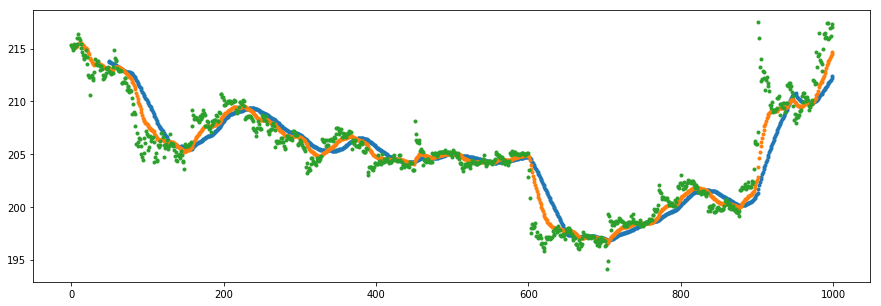

In [47]:
%matplotlib inline
# pd.set_option('display.mpl_style', 'default')

plt.rcParams['figure.figsize'] = (15, 5)

# plt.plot(chart['macd'], '.')
# plt.plot(chart['signal'], '.')

plt.plot(chart['sma50'], '.')
plt.plot(chart['ema30'], '.')
plt.plot(chart['close'], '.')

plt.show()

# chart['change'].plot(figsize=(15, 10))

In [14]:
chart.tail()

,mts,open,close,high,low,volume,ema12,ema26,macd,signal,sma50,ema30,diff,change
115,1541521800000,215.920000,215.99,216.00,215.91000,747.287134,215.691631,214.283825,1.407806,1.377036,211.810365,213.966636,0.089600,0.000423
116,1541523600000,215.986763,216.98,217.02,215.98000,1092.888070,215.889842,214.483566,1.406276,1.382884,211.932565,214.161126,0.122200,0.000577
117,1541525400000,216.970000,216.24,216.97,216.24000,529.340738,215.943712,214.613687,1.330025,1.372312,212.047332,214.295298,0.114767,0.000542
118,1541527200000,216.240000,217.10,217.25,216.24000,2997.536238,216.121603,214.797878,1.323725,1.362595,212.198332,214.476311,0.151000,0.000712
119,1541529000000,217.010000,217.42,217.42,217.00108,477.193871,216.321356,214.992128,1.329228,1.355921,212.382332,214.666290,0.184000,0.000867


/home/niedexi/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


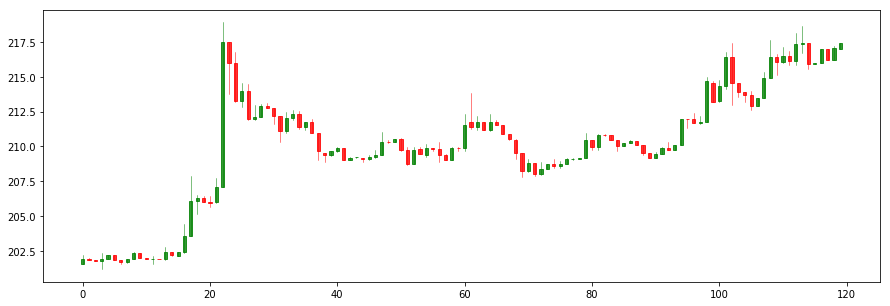

In [15]:
from mpl_finance import candlestick_ohlc

date = chart.index
open = chart['open'].tolist()
high = chart['high'].tolist()
low = chart['low'].tolist()
close = chart['close'].tolist()

ohlc = list(zip(date, open, high, low, close))

fig = plt.subplot()
ax1 = plt.subplot()
candlestick_ohlc(ax1, ohlc, width=0.5, colorup='g', colordown='r', alpha=0.8)

plt.show()